<a href="https://colab.research.google.com/github/MariaElisaOliveiraMartins/Curso_DS_Pro/blob/main/Teste_03_(d)_Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 06
## Árvores de decisão como ferramentas de machine-learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# importando libs
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# carregando os dados
df = pd.read_excel('/content/drive/My Drive/Dados_DS/2015_2.xlsx')

In [ ]:
bkp = df.copy()
df.shape

(99999, 263)

In [ ]:
df = bkp.copy()
print('\n', df.shape, bkp.shape, '\n')
df.dtypes


 (99999, 263) (99999, 263) 



_STATE      int64
FMONTH      int64
IDATE      object
IMONTH     object
IDAY       object
           ...   
_AGE_G    float64
HTIN4     float64
HTM4      float64
WTKG3     float64
_BMI5     float64
Length: 263, dtype: object

In [ ]:
# Amostragem aleatória
#df = df.sample(100000, random_state = RSEED)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,_RFHLTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,...,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5
0,1,1,b'01292015',b'01',b'29',b'2015',2,1200,2015000001,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,15,18.0,10.0,1,1,2,1,1.0,1.0,1.0,1.0,1.0,...,10,1,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0
1,1,1,b'01202015',b'01',b'20',b'2015',1,1100,2015000002,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,88,88.0,NaN,2,1,1,4,3.0,NaN,1.0,4.0,2.0,...,10,1,b'',b'',5.0,11011.0,28.78156,1.0,28.781560,NaN,NaN,NaN,NaN,9.0,NaN,108.060903,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,52.0,4.0,68.0,173.0,7484.0,2509.0
2,1,1,b'02012015',b'02',b'01',b'2015',2,1200,2015000003,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,15,88.0,88.0,1,2,2,1,3.0,NaN,1.0,1.0,1.0,...,10,1,b'',b'',5.0,11011.0,28.78156,2.0,57.563120,NaN,NaN,NaN,NaN,1.0,0.614125,255.264797,9.0,1.0,1.0,2.0,NaN,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,11.0,2.0,71.0,6.0,71.0,180.0,7167.0,2204.0
3,1,1,b'01142015',b'01',b'14',b'2015',2,1100,2015000004,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,30,30.0,30.0,1,2,1,1,1.0,1.0,1.0,1.0,1.0,...,10,1,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,67.0,170.0,8165.0,2819.0
4,1,1,b'01142015',b'01',b'14',b'2015',2,1100,2015000005,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,20,88.0,30.0,1,1,2,1,3.0,NaN,1.0,1.0,2.0,...,10,1,b'',b'',3.0,11011.0,28.78156,2.0,57.563120,NaN,NaN,NaN,NaN,9.0,NaN,258.682223,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,64.0,163.0,6441.0,2437.0


In [ ]:
# Obtém somente os campos numéricos
df = df.select_dtypes('number')
df.head()

,_STATE,FMONTH,_RFHLTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,...,ADMOVE,MISTMNT,ADANXEV,QSTVER,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5
0,1,1,2,1200,2015000001,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,15,18.0,10.0,1,1,2,1,1.0,1.0,1.0,1.0,1.0,2,2,2,1.0,...,NaN,NaN,NaN,10,3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0
1,1,1,1,1100,2015000002,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,88,88.0,NaN,2,1,1,4,3.0,NaN,1.0,4.0,2.0,2,2,2,2.0,...,NaN,NaN,NaN,10,5.0,11011.0,28.78156,1.0,28.781560,NaN,NaN,NaN,NaN,9.0,NaN,108.060903,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,52.0,4.0,68.0,173.0,7484.0,2509.0
2,1,1,2,1200,2015000003,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,15,88.0,88.0,1,2,2,1,3.0,NaN,1.0,1.0,1.0,7,2,1,2.0,...,NaN,NaN,NaN,10,5.0,11011.0,28.78156,2.0,57.563120,NaN,NaN,NaN,NaN,1.0,0.614125,255.264797,9.0,1.0,1.0,2.0,NaN,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,11.0,2.0,71.0,6.0,71.0,180.0,7167.0,2204.0
3,1,1,2,1100,2015000004,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,30,30.0,30.0,1,2,1,1,1.0,1.0,1.0,1.0,1.0,2,2,2,2.0,...,NaN,NaN,NaN,10,3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,67.0,170.0,8165.0,2819.0
4,1,1,2,1100,2015000005,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,20,88.0,30.0,1,1,2,1,3.0,NaN,1.0,1.0,2.0,2,2,2,2.0,...,NaN,NaN,NaN,10,3.0,11011.0,28.78156,2.0,57.563120,NaN,NaN,NaN,NaN,9.0,NaN,258.682223,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,61.0,5.0,64.0,163.0,6441.0,2437.0


In [ ]:
# elimina alguns outliers, renomeia colunas
print('\n 1 - ', df.shape)
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
print('\n 2 - ', df.shape)
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
print('\n 3 - ', df.shape, '\n')
df = df.rename(columns = {'_RFHLTH': 'label'})
df['label'].value_counts()



 1 -  (99999, 254)

 2 -  (99999, 254)

 3 -  (8059, 254) 



1    6015
0    2044
Name: label, dtype: int64

In [ ]:
# Remove campos que não são importantes, são outras versões de campo layer
df.drop(['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2',
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'],axis=1, inplace=True)
print(df.shape, '\n')
print(df.head())

(8059, 245) 

   _STATE  FMONTH  label  DISPCODE  ...  HTIN4   HTM4    WTKG3   _BMI5
0       1       1      0      1200  ...   70.0  178.0  12701.0  4018.0
1       1       1      1      1100  ...   68.0  173.0   7484.0  2509.0
2       1       1      0      1200  ...   71.0  180.0   7167.0  2204.0
3       1       1      0      1100  ...   67.0  170.0   8165.0  2819.0
4       1       1      0      1100  ...   64.0  163.0   6441.0  2437.0

[5 rows x 245 columns]


In [ ]:
newdf = df.loc[df.label == 0]
newdf.head

<bound method NDFrame.head of       _STATE  FMONTH  label  DISPCODE  ...  HTIN4   HTM4    WTKG3   _BMI5
0          1       1      0      1200  ...   70.0  178.0  12701.0  4018.0
2          1       1      0      1200  ...   71.0  180.0   7167.0  2204.0
3          1       1      0      1100  ...   67.0  170.0   8165.0  2819.0
4          1       1      0      1100  ...   64.0  163.0   6441.0  2437.0
7          1       1      0      1100  ...   61.0  155.0   8119.0  3382.0
...      ...     ...    ...       ...  ...    ...    ...      ...     ...
8054       2       2      0      1200  ...   69.0  175.0  10387.0  3382.0
8083       2       1      0      1100  ...   63.0  160.0   6532.0  2551.0
8084       2       1      0      1100  ...   70.0  178.0   8845.0  2798.0
8091       2       1      0      1100  ...   63.0  160.0   9208.0  3596.0
8092       2       1      0      1100  ...   71.0  180.0   8573.0  2636.0

[2044 rows x 245 columns]>

In [ ]:
df = df.loc[df.label == 1]
sboa.head

<bound method NDFrame.head of       _STATE  FMONTH  label  DISPCODE  ...  HTIN4   HTM4    WTKG3   _BMI5
6816       1      10      1      1100  ...   75.0  191.0      NaN     NaN
2123       1       4      1      1100  ...   65.0  165.0   7938.0  2912.0
7620       1      12      1      1100  ...   65.0  165.0   9072.0  3328.0
7032       1      10      1      1200  ...   63.0  160.0   7167.0  2799.0
975        1       2      1      1100  ...   72.0  183.0   9026.0  2699.0
...      ...     ...    ...       ...  ...    ...    ...      ...     ...
5101       1       5      1      1200  ...   64.0  163.0   8936.0  3381.0
5114       1       5      1      1200  ...   68.0  173.0   7257.0  2433.0
5513       1       6      1      1100  ...   69.0  175.0   9934.0  3234.0
3711       1       1      1      1200  ...   73.0  185.0   8845.0  2573.0
5693       1       7      1      1100  ...   72.0  183.0  11748.0  3513.0

[2044 rows x 245 columns]>

In [ ]:
qtdelinhas = newdf.shape[0]
df = df.sample(n=qtdelinhas, random_state = None)
print(newdf.shape, df.shape)

(2044, 245) (2044, 245)


In [ ]:
df = df.append(newdf, ignore_index=True)
df.shape

(4088, 245)

In [ ]:
labels = np.array(df.pop('label'))
# separa os dados
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3)

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Cria modelo com cem árvores
model = RandomForestClassifier(n_estimators=100, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
# Ajusta
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [ ]:
# Fazendo predições usando os dados de teste
rf_predictions = model.predict(test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()

Confusion matrix, without normalization
[[481 132]
 [136 478]]


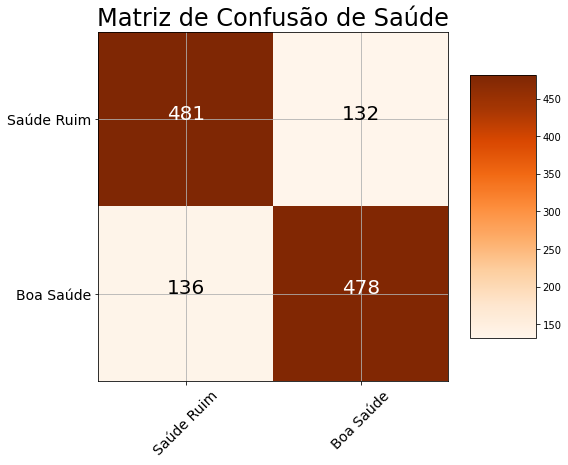

In [ ]:
# Criar e exibir a matriz de confusão
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Saúde Ruim', 'Boa Saúde'],
                      title = 'Matriz de Confusão de Saúde')

In [ ]:
features = list(train.columns)
fi = pd.DataFrame({'feature': features,
                   'importância': model.feature_importances_}).\
                    sort_values('importância', ascending = False)
fi.head()

,feature,importância
58,QLACTLM2,0.062361
62,DIFFWALK,0.036967
51,EMPLOY1,0.033025
91,JOINPAIN,0.024278
228,_DRDXAR1,0.022265


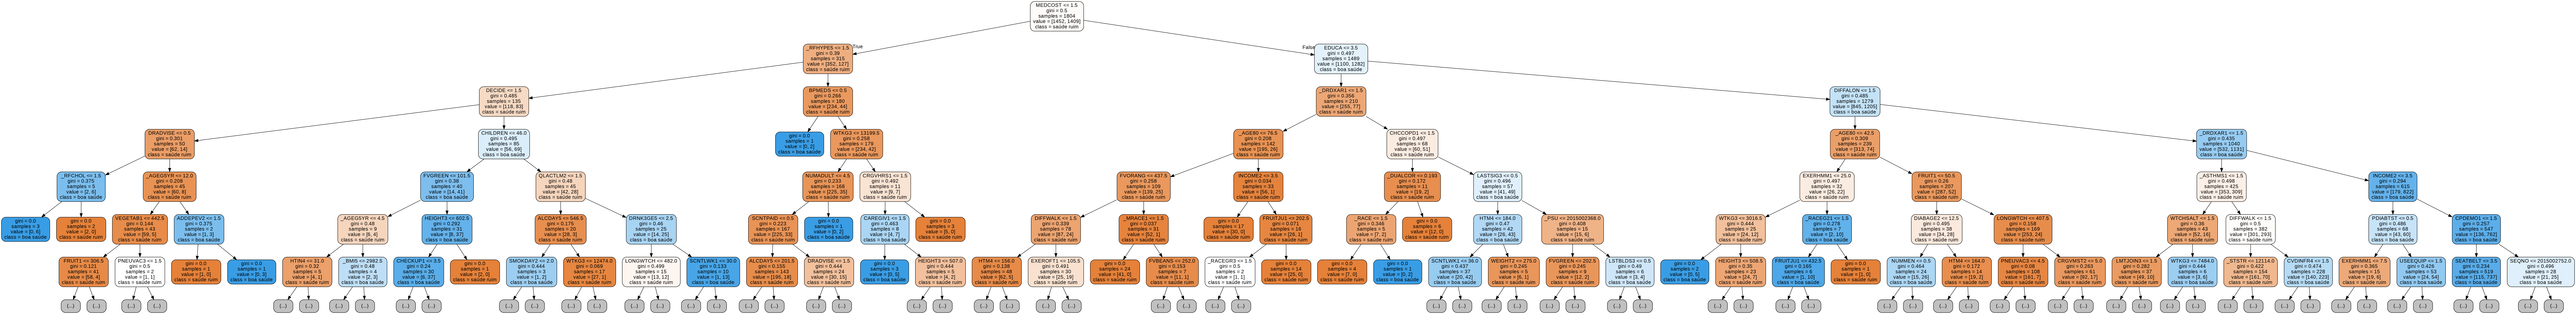

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# salvar árvore em formato dot
export_graphviz(model.estimators_[1], 'arvore.dot', rounded = True, 
                feature_names = features, max_depth = 6,
                class_names = ['saúde ruim', 'boa saúde'], filled = True)

# Coverter para format png
call(['dot', '-Tpng', 'arvore.dot', '-o', 'arvore.png', '-Gdpi=200'])

# Visualize
Image(filename='arvore.png')